# Linear Regression

`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

## Simple Linear Regression

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

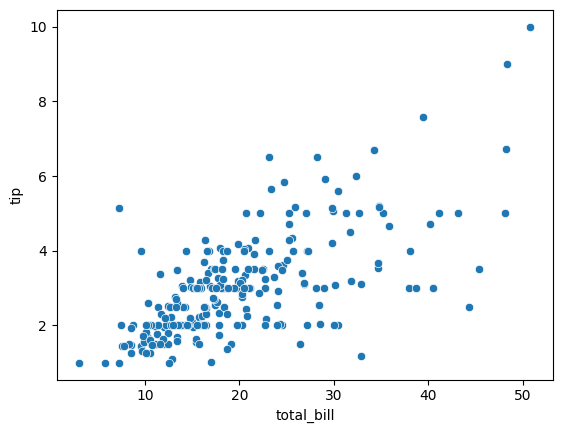

In [3]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [4]:
# split the data into X and y
X = df[['total_bill']]
# scalar = MinMaxScaler()
# X = scalar.fit_transform(X)
y = df['tip']

In [5]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# call the model
model = LinearRegression()

In [7]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

1.0329992847602438
[0.09852558]
y =  1.0329992847602438 + [0.09852558] * X


In [9]:
model.predict([[5]])

c:\Users\city\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.52562718])

In [10]:
# predict
y_pred = model.predict(X_test)

In [11]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.826609429823711
R2 =  0.6137040640205769
RMSE =  0.9091806365204392


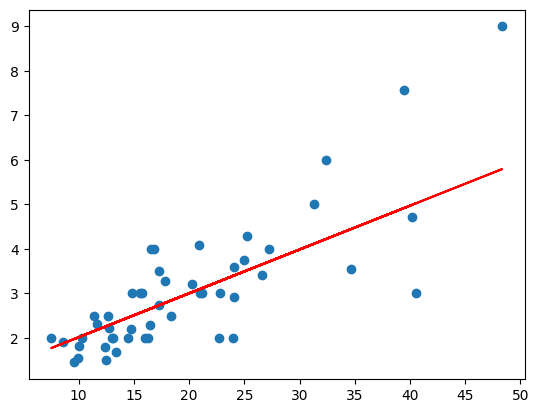

In [12]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

# Performance Metrics in Linear Regression

In the context of evaluating the performance of a linear regression model, the following metrics are commonly used: **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R²)**. Here’s what each of these metrics means and how they are used:

## 1. Mean Squared Error (MSE)

- **Definition**: 
  Mean Squared Error is the average of the squared differences between the actual values and the predicted values.
- **Formula**:
  \[
  \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
  \]
  Where:
  - \( N \) is the number of data points.
  - \( y_i \) is the actual value for the \(i^{th}\) observation.
  - \( \hat{y}_i \) is the predicted value for the \(i^{th}\) observation.
- **Interpretation**: 
  - A lower MSE indicates a better fit of the model to the data. However, since MSE squares the errors, it gives more weight to larger errors, making it sensitive to outliers.

## 2. Root Mean Squared Error (RMSE)

- **Definition**: 
  Root Mean Squared Error is the square root of the Mean Squared Error. It brings the error metric back to the original units of the output variable, making it easier to interpret.
- **Formula**:
  \[
  \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
  \]
- **Interpretation**: 
  - RMSE gives an estimate of the standard deviation of the prediction errors (residuals). Like MSE, a lower RMSE indicates a better fit. Since RMSE is in the same units as the dependent variable, it is often more intuitive to interpret than MSE.

## 3. R-squared (R²)

- **Definition**: 
  R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
- **Formula**:
  \[
  R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
  \]
  Where:
  - \( \text{SS}_{\text{res}} = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 \) is the sum of squared residuals (errors).
  - \( \text{SS}_{\text{tot}} = \sum_{i=1}^{N} (y_i - \bar{y})^2 \) is the total sum of squares (variance of the actual values).
  - \( \bar{y} \) is the mean of the actual values.
- **Interpretation**: 
  - \( R^2 \) ranges from 0 to 1, where:
    - \( R^2 = 1 \) indicates that the model perfectly explains the variance in the data.
    - \( R^2 = 0 \) indicates that the model does not explain any of the variance in the data.
  - A higher \( R^2 \) indicates a better fit of the model, meaning that more of the variability in the dependent variable is explained by the independent variables.

## Summary of the Metrics

- **MSE**: Measures the average of the squared errors. Sensitive to outliers.
- **RMSE**: Square root of MSE, in the same units as the dependent variable. Easier to interpret.
- **R²**: Proportion of variance explained by the model. Indicates the goodness of fit.

These metrics help assess how well a linear regression model is performing, guiding adjustments to improve model accuracy and predictive power.


# Understanding the Use and Benefits of Regression Metrics

In linear regression, **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared (R²)** are critical metrics that help evaluate model performance. Here’s how they are used and the benefits they offer:

## 1. Mean Squared Error (MSE)

- **Use**: 
  - MSE is used to quantify the average squared difference between the observed actual outcomes and the outcomes predicted by the model. It is a key metric for assessing the accuracy of a linear regression model.
- **Benefit**:
  - **Model Accuracy**: MSE measures how well your model’s predictions match the actual data. A lower MSE indicates a better fit.
  - **Model Comparison**: MSE allows for comparison between different models or iterations. The model with the lowest MSE is generally the best.
  - **Outlier Sensitivity**: MSE gives more weight to larger errors, making it useful for identifying models that might be affected by outliers.

## 2. Root Mean Squared Error (RMSE)

- **Use**:
  - RMSE, the square root of MSE, is used for measuring differences between predicted and actual values. It expresses this difference in the same units as the target variable, making it more interpretable.
- **Benefit**:
  - **Interpretability**: RMSE is easier to understand because it is in the same units as the data, making the average magnitude of errors more interpretable.
  - **Error Analysis**: RMSE helps in understanding the model’s prediction errors. A smaller RMSE indicates a well-performing model.
  - **Standardization**: RMSE is on the same scale as the data, providing a standardized way to evaluate and compare the accuracy of different models.

## 3. R-squared (R²)

- **Use**:
  - R-squared measures the proportion of variance in the dependent variable that is predictable from the independent variable(s). It provides insight into how well the model explains the variability of the data.
- **Benefit**:
  - **Model Fit**: R² helps in understanding how well the regression model fits the data. A higher R² indicates a desirable fit, where the model explains a large portion of the variance.
  - **Goodness-of-Fit**: R² is a widely used metric for assessing the goodness-of-fit of a model, indicating whether the independent variables are good predictors of the dependent variable.
  - **Model Comparison**: R² allows comparison of model performance. A model with a higher R² is generally considered to have a better fit, though overfitting should be considered.

## Summary of Benefits

- **MSE** and **RMSE** provide insights into the magnitude of prediction errors, helping improve model accuracy.
- **R²** measures how well your model explains the variability in the data, aiding in the evaluation of the model's effectiveness.
- Together, these metrics help refine models, improve prediction accuracy, and ensure models generalize well to new data. They are essential for building reliable and robust predictive models in machine learning and data analysis.
